In [1]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [7]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

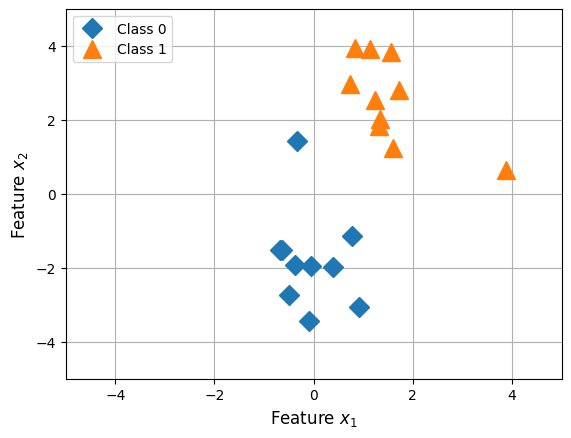

In [8]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [10]:
# normalize input
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train

array([[ 0.0305863 , -0.61935683],
       [-1.00464248,  0.41995414],
       [ 0.1623427 , -1.39682589],
       [-1.04228716, -0.92953879],
       [-1.2869776 , -0.77646198],
       [-0.32703818, -0.96176548],
       [-1.15522121, -1.26389077],
       [-1.33403345, -0.77243364],
       [-0.78818555, -1.54184603],
       [-0.7411297 , -0.94565213],
       [ 2.95746041,  0.10171551],
       [-0.00705838,  1.03628972],
       [ 0.08705333,  1.42703842],
       [ 0.80230231,  0.34341574],
       [ 0.37879962,  1.41495341],
       [ 0.9340587 ,  0.96780799],
       [ 0.53878953,  0.58511596],
       [ 0.77406879,  1.39078338],
       [ 0.46350016,  0.86307122],
       [ 0.55761187,  0.65762603]])

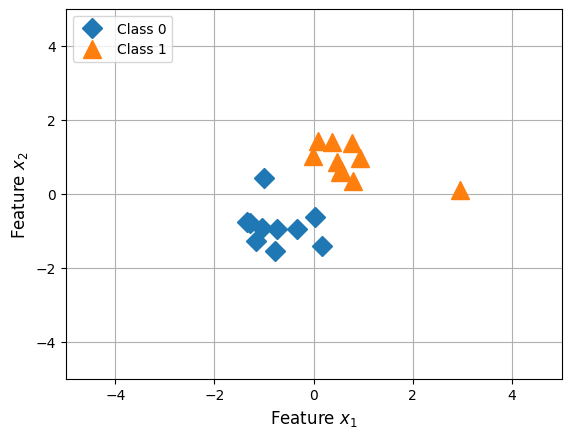

In [11]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [13]:
import torch

class LogisticRegression(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, 1)

    def forward(self, x):
        logits = self.linear(x)
        # activation function
        probas = torch.sigmoid(logits)
        return probas

In [14]:
torch.manual_seed(1)

model = LogisticRegression(2)

In [19]:
x = torch.tensor([1.1, 2.1])

with torch.no_grad(): # don't apply the gradient decent
    proba = model(x)
    
print(proba, proba.shape)

tensor([0.4033]) torch.Size([1])


In [17]:
# define data loader for training
from torch.utils.data import Dataset, DataLoader

class MyDataSet(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.float32)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return self.labels.shape[0]

train_ds = MyDataSet(X_train, y_train)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 10,
    shuffle = True
)

In [18]:
for batch_index, (features, labels) in enumerate(train_loader):
    print(features, labels)

tensor([[ 0.7741,  1.3908],
        [ 0.5388,  0.5851],
        [-1.2870, -0.7765],
        [ 2.9575,  0.1017],
        [-1.3340, -0.7724],
        [-0.7411, -0.9457],
        [ 0.0871,  1.4270],
        [ 0.1623, -1.3968],
        [ 0.5576,  0.6576],
        [-1.0046,  0.4200]]) tensor([1., 1., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([[-1.0423, -0.9295],
        [-0.0071,  1.0363],
        [-0.3270, -0.9618],
        [ 0.8023,  0.3434],
        [-1.1552, -1.2639],
        [ 0.0306, -0.6194],
        [ 0.4635,  0.8631],
        [ 0.9341,  0.9678],
        [-0.7882, -1.5418],
        [ 0.3788,  1.4150]]) tensor([0., 1., 0., 1., 0., 0., 1., 1., 0., 1.])


In [29]:
train_ds = MyDataSet(X_train, y_train)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 10,
    shuffle = True
)

import torch.nn.functional as F
torch.manual_seed(1)
model = LogisticRegression(num_features = 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    print("-----------------")
    for batch_idx, (features, labels) in enumerate(train_loader):
        probas = model(features) #sigmoid return is a probility, [0, 1]

        # labels.view(shape) -- change original labels(1, 10) to (10, 1)
        # loss function is F.binary_cross_entropy
        loss = F.binary_cross_entropy(probas, labels.view(probas.shape))

        optimizer.zero_grad()
        loss.backward() # calculate the graident decent
        optimizer.step()

        ### LOGGING
        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
               f' | Batch {batch_idx + 1:03d}/{len(train_loader):03d}'
               f' | Loss: {loss:.2f}'
               f' | {model.linear.weight}')        

-----------------
Epoch: 001/020 | Batch 001/002 | Loss: 0.67 | Parameter containing:
tensor([[ 0.3824, -0.2914]], requires_grad=True)
Epoch: 001/020 | Batch 002/002 | Loss: 0.73 | Parameter containing:
tensor([[ 0.3967, -0.2655]], requires_grad=True)
-----------------
Epoch: 002/020 | Batch 001/002 | Loss: 0.67 | Parameter containing:
tensor([[ 0.4135, -0.2408]], requires_grad=True)
Epoch: 002/020 | Batch 002/002 | Loss: 0.67 | Parameter containing:
tensor([[ 0.4277, -0.2204]], requires_grad=True)
-----------------
Epoch: 003/020 | Batch 001/002 | Loss: 0.60 | Parameter containing:
tensor([[ 0.4459, -0.2009]], requires_grad=True)
Epoch: 003/020 | Batch 002/002 | Loss: 0.68 | Parameter containing:
tensor([[ 0.4575, -0.1768]], requires_grad=True)
-----------------
Epoch: 004/020 | Batch 001/002 | Loss: 0.69 | Parameter containing:
tensor([[ 0.4677, -0.1493]], requires_grad=True)
Epoch: 004/020 | Batch 002/002 | Loss: 0.54 | Parameter containing:
tensor([[ 0.4860, -0.1346]], requires_gra